Iris Flower Classification is one of the most popular case studies among the data science community. Almost every data science newbie has solved this case study once in their life. Here, you are given the measurements associated with each species of iris flower and based on this data, you have to train a machine learning model for the task of classifying iris flowers.

### Import Libraries and Dateset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Now let’s have a look at the first five rows of this dataset:

In [2]:
#Loading Dataset
df = sns.load_dataset('iris')

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

Now let’s have a look at the descriptive statistics of this dataset:

### Descriptive Statistics

In [3]:
# Preview data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Dataset dimensions - (rows, columns)
df.shape

(150, 5)

In [6]:
# Count of null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# Statistical summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The target labels of this dataset are present in the species column, let’s have a quick look at the target labels:

In [8]:
print("Target Labels", df["species"].unique())

Target Labels ['setosa' 'versicolor' 'virginica']


In [9]:
#map function, convering in numerical values
df['species']=df['species'].map({'setosa':0,'versicolor':1, 'virginica':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Data Visualization

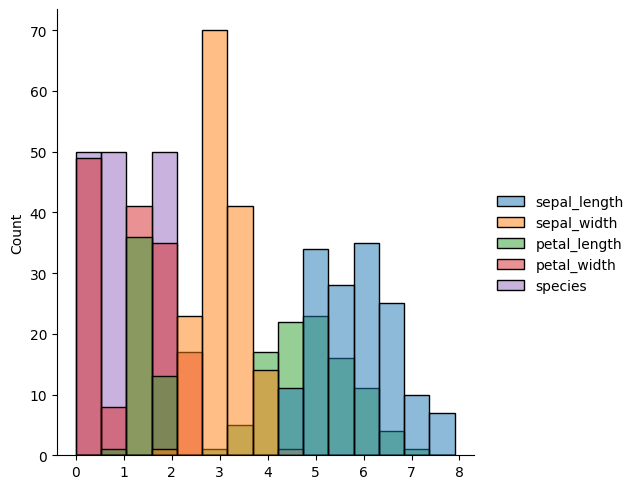

In [10]:
sns.displot(df,bins=15)

Now let’s plot the data using a scatter plot which will plot the iris species according to the sepal length and sepal width:

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>,
        <Axes: xlabel='species', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>,
        <Axes: xlabel='species', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>,
        <Axes: xlabel='species', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_wid

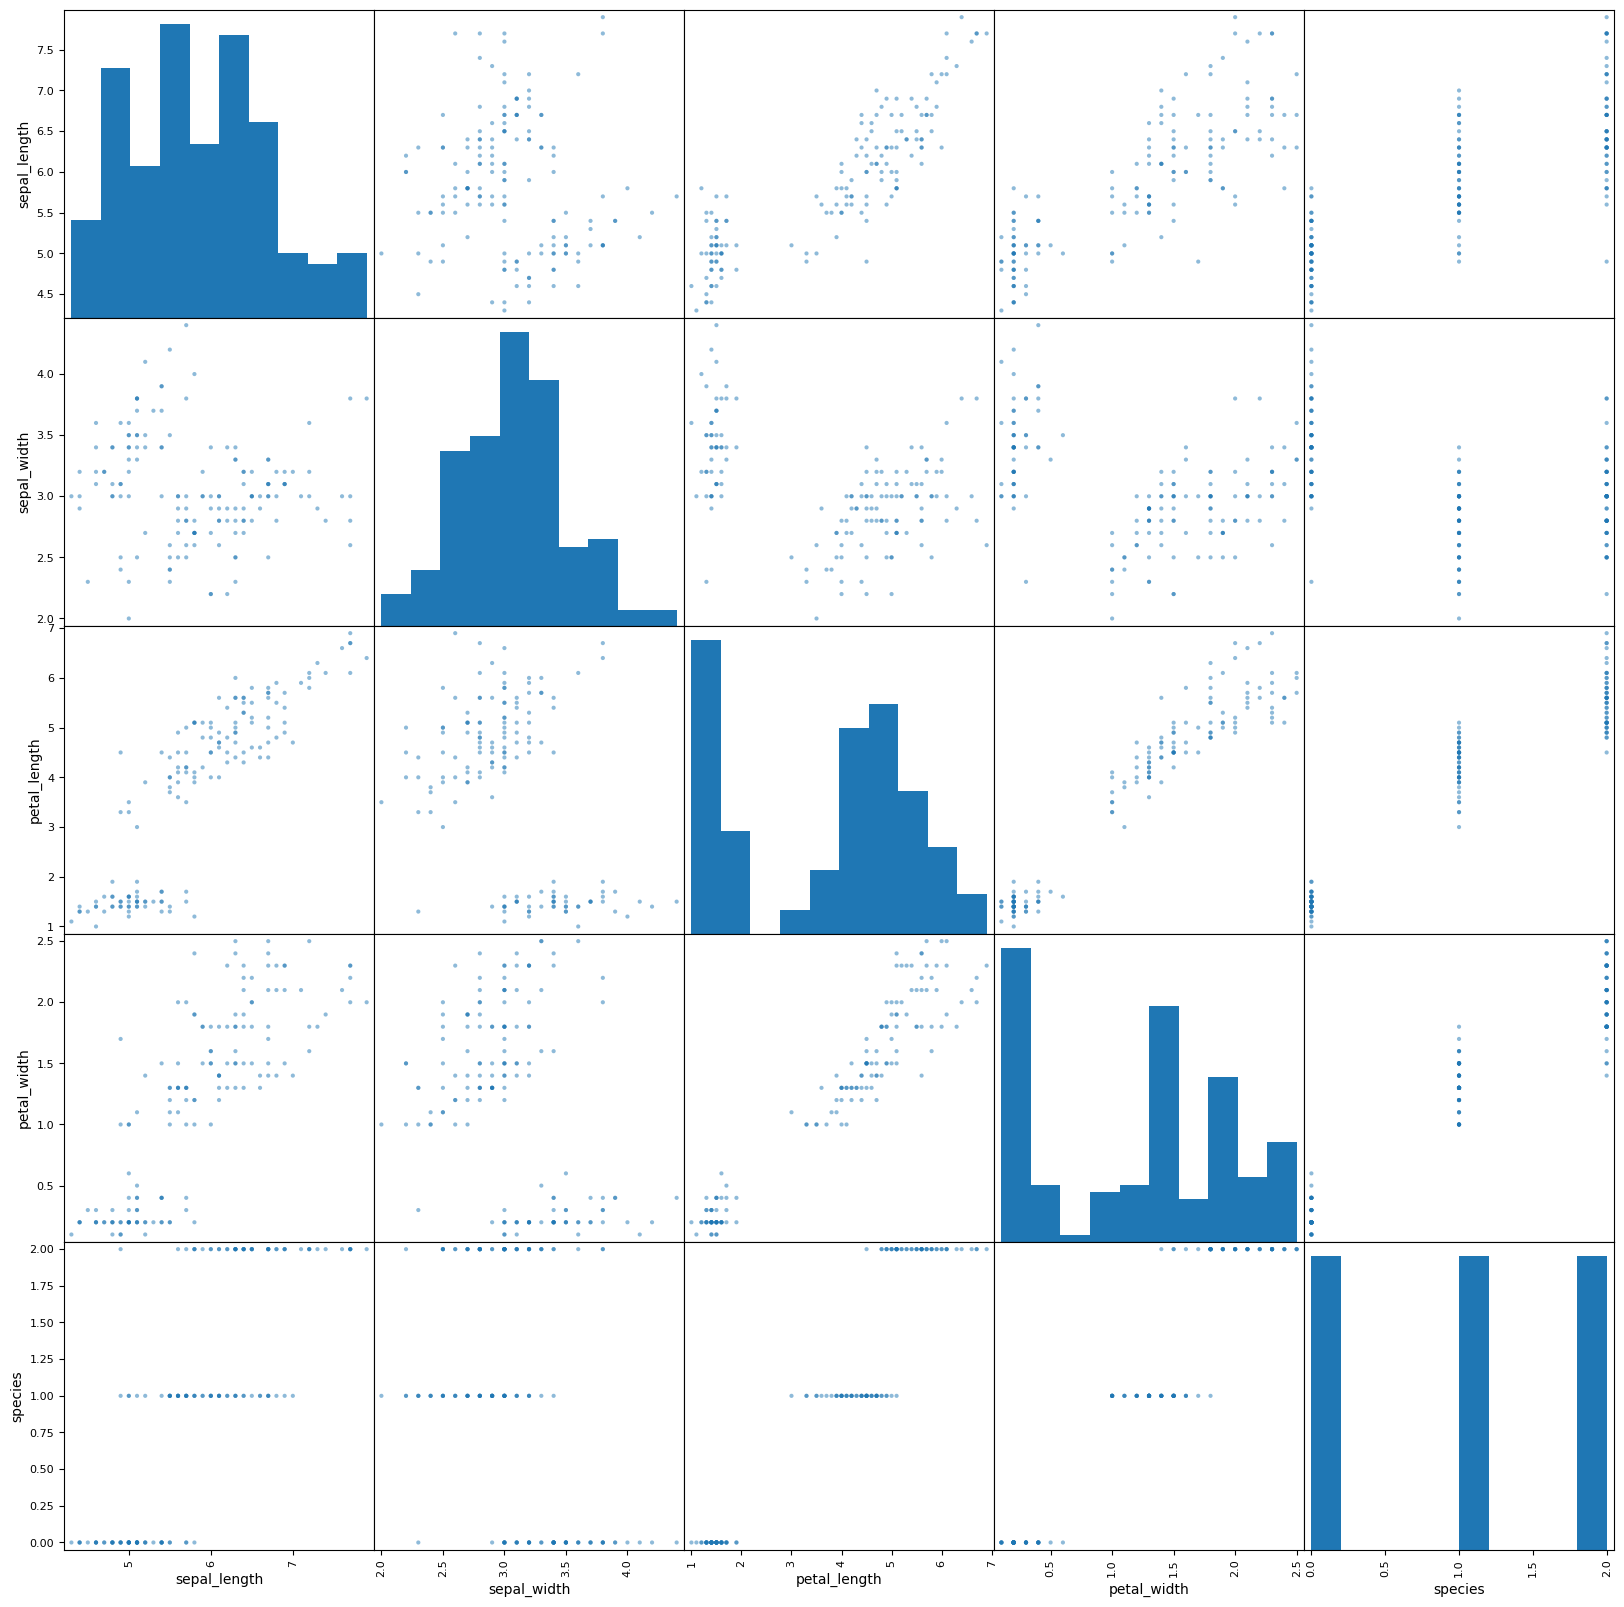

In [11]:
# Scatter plot matrix 
pd.plotting.scatter_matrix(df, figsize = (20, 20))

In [12]:
import plotly.express as px
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

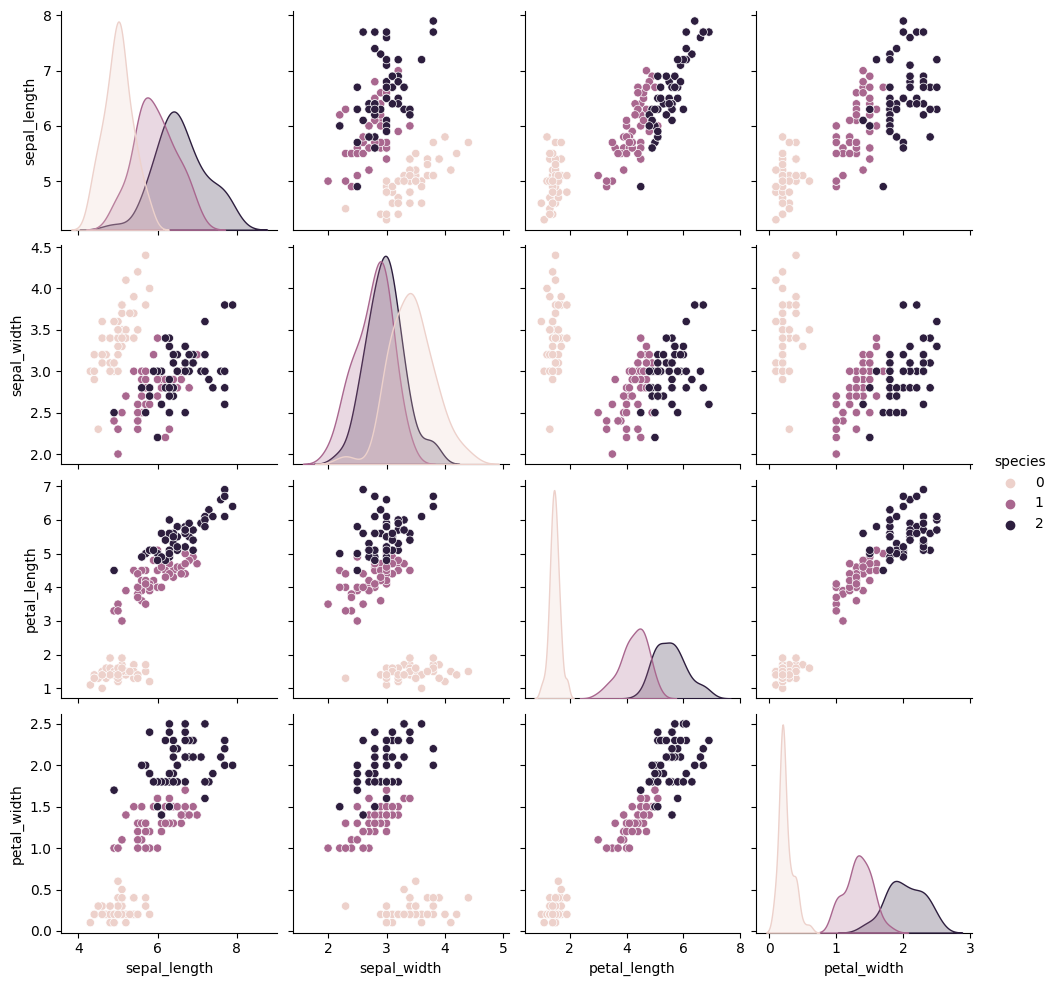

In [13]:
# Pairplot 
sns.pairplot(data = df, hue = 'species')
plt.show()

### Correlation

In [14]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


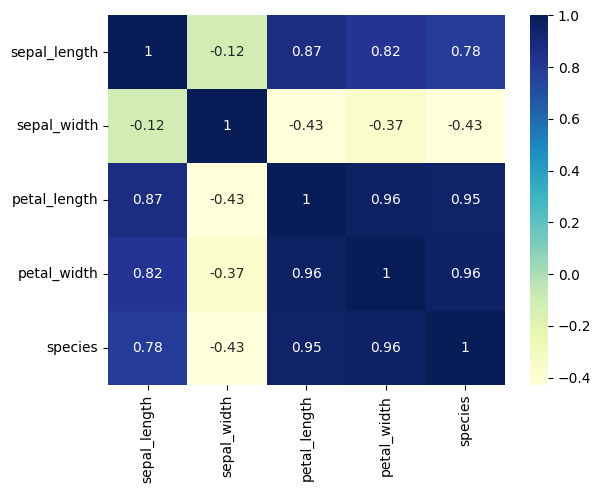

In [15]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

### EDA and Outlier Detection

- [ ] sepal_length

<Axes: xlabel='sepal_length', ylabel='Count'>

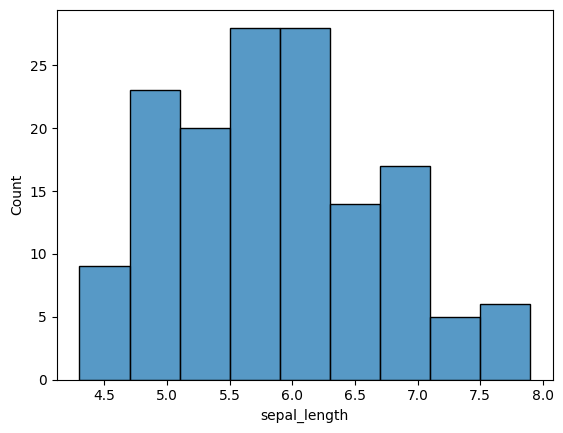

In [16]:
sns.histplot(df['sepal_length'])

In [17]:
q1,q3 = np.percentile(df['sepal_length'],(25,75))
print(q1,q3)

5.1 6.4


In [18]:
IQR = q3 - q1
IQR

1.3000000000000007

In [19]:
lower_fence = q1 - (1.5 * IQR)
upper_fence = q3 + (1.5 * IQR)
print(lower_fence,upper_fence)

3.1499999999999986 8.350000000000001


<Axes: >

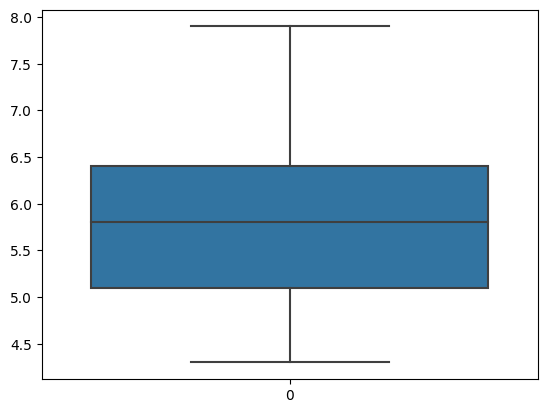

In [20]:
sns.boxplot(df['sepal_length'])

In [21]:
df['sepal_length'].isnull().sum()

0

- [ ] sepal_width

<Axes: xlabel='sepal_width', ylabel='Count'>

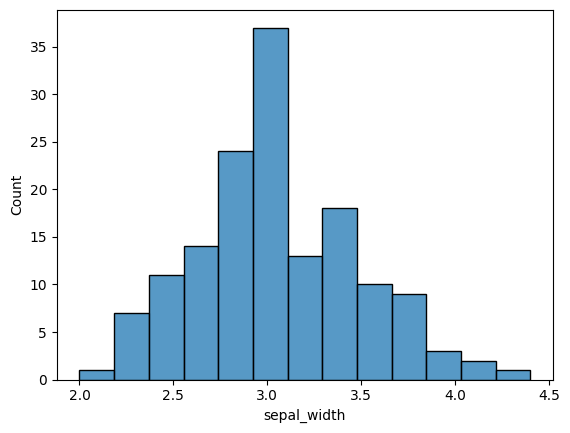

In [22]:
sns.histplot(df['sepal_width'])

In [23]:
q1,q3 = np.percentile(df['sepal_width'],(25,75))
print(q1,q3)

2.8 3.3


In [24]:
IQR = q3 - q1
IQR

0.5

In [25]:
lower_fence = q1 - (1.5 * IQR)
upper_fence = q3 + (1.5 * IQR)
print(lower_fence,upper_fence)

2.05 4.05


<Axes: >

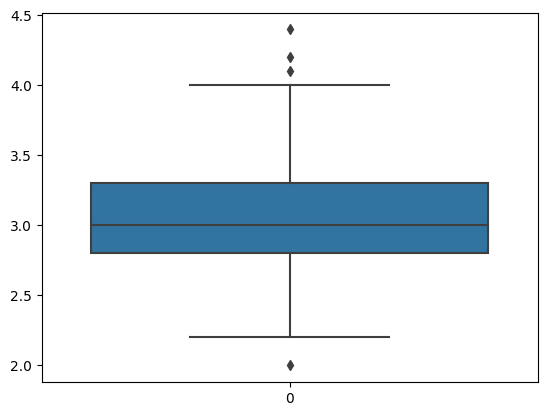

In [26]:
sns.boxplot(df['sepal_width'])

In [27]:
df.loc[df['sepal_width'] < 2.05]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,1


In [28]:
df.loc[df['sepal_width'] < 2.05, 'sepal_width'] = np.nan

<Axes: >

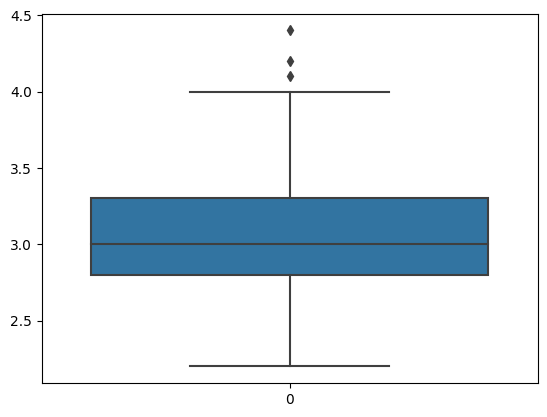

In [29]:
sns.boxplot(df['sepal_width'])

In [30]:
df.loc[df['sepal_width'] > 4.05]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


In [31]:
df.loc[df['sepal_width'] > 4.05, 'sepal_width'] = np.nan

<Axes: >

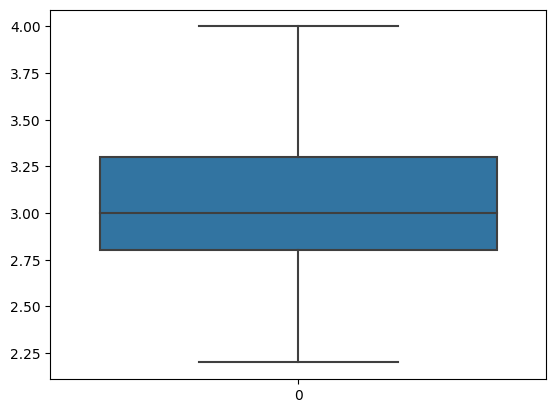

In [32]:
sns.boxplot(df['sepal_width'])

<Axes: xlabel='sepal_width', ylabel='Count'>

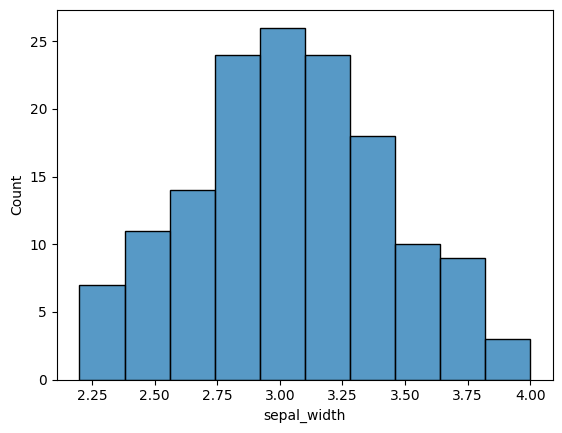

In [33]:
sns.histplot(df['sepal_width'])

In [34]:
df['sepal_width'].isnull().sum()

4

- [ ] petal_length

<Axes: xlabel='petal_length', ylabel='Count'>

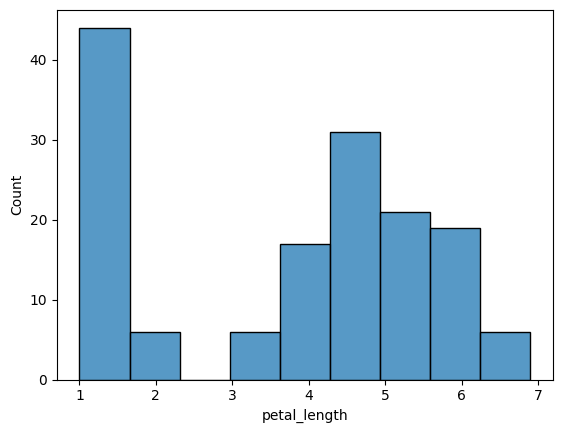

In [35]:
sns.histplot(df['petal_length'])

In [36]:
q1,q3 = np.percentile(df['petal_length'],(25,75))
print(q1,q3)

1.6 5.1


In [37]:
IQR = q3 - q1
IQR

3.4999999999999996

In [38]:
lower_fence = q1 - (1.5 * IQR)
upper_fence = q3 + (1.5 * IQR)
print(lower_fence,upper_fence)

-3.649999999999999 10.349999999999998


<Axes: >

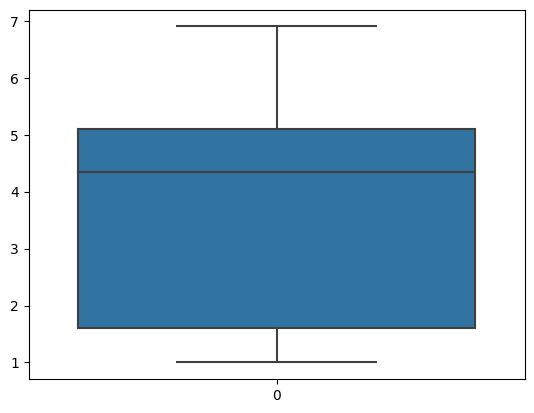

In [39]:
sns.boxplot(df['petal_length'])

In [40]:
df['petal_length'].isnull().sum()

0

- [ ] petal_width

<Axes: xlabel='petal_width', ylabel='Count'>

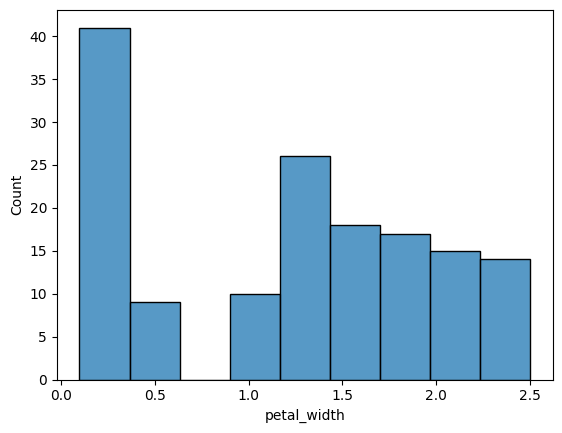

In [41]:
sns.histplot(df['petal_width'])

In [42]:
q1,q3 = np.percentile(df['petal_width'],(25,75))
print(q1,q3)

0.3 1.8


In [43]:
IQR = q3 - q1
IQR

1.5

In [44]:
lower_fence = q1 - (1.5 * IQR)
upper_fence = q3 + (1.5 * IQR)
print(lower_fence,upper_fence)

-1.95 4.05


<Axes: >

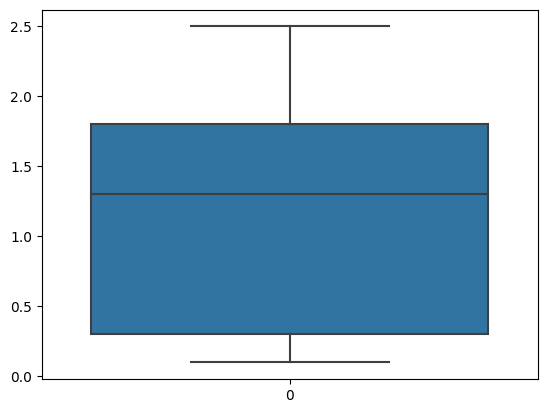

In [45]:
sns.boxplot(df['petal_width'])

In [46]:
df['petal_width'].isnull().sum()

0

- [ ] species

<Axes: xlabel='species', ylabel='count'>

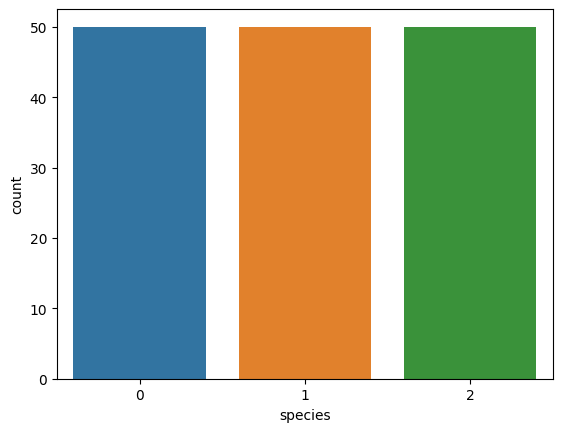

In [47]:
sns.countplot(x = 'species', data=df)

### Missing Data

In [48]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
df.isnull().sum()

sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
species         0
dtype: int64

In [50]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,146.000000,150.000000,150.000000,150.000000
mean,5.843333,3.040411,3.758000,1.199333,1.000000
std,0.828066,0.397853,1.765298,0.762238,0.819232
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


/tmp/ipykernel_19/3557486826.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




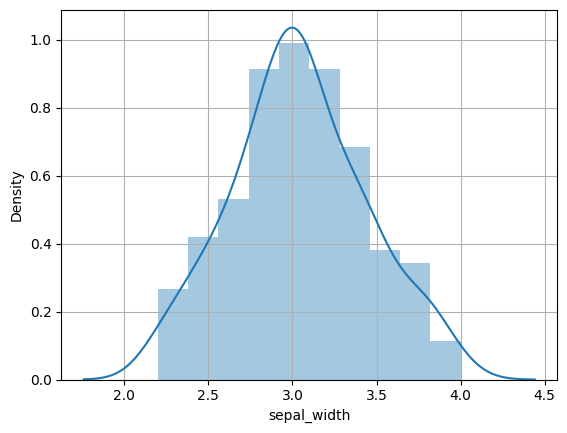

In [51]:
sns.distplot(df['sepal_width'])
plt.grid()

In [52]:
# Replacing NaN with Mean values
df["sepal_width"].fillna(df["sepal_width"].mean(), inplace = True)

In [53]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [54]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Iris Classification Model

Now let’s train a machine learning model for the task of classifying iris species. Here, I will first split the data into training and test sets, and then I will use the **Linear Regression, Logistic Regression, Decision Tree, Random Forest, Navïe Bayes, K-NN** algorithm to train the iris classification model:

In [55]:
#independent and dependent features
x = df.iloc[:,:-1] #leaving last column
y = df.iloc[:,-1]

In [56]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [58]:
#Train Test Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=45)

In [59]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
76,6.8,2.800000,4.8,1.4
96,5.7,2.900000,4.2,1.3
119,6.0,2.200000,5.0,1.5
101,5.8,2.700000,5.1,1.9
25,5.0,3.000000,1.6,0.2
...,...,...,...,...
68,6.2,2.200000,4.5,1.5
95,5.7,3.000000,4.2,1.2
32,5.2,3.040411,1.5,0.1
124,6.7,3.300000,5.7,2.1


In [60]:
y_train

76     1
96     1
119    2
101    2
25     0
      ..
68     1
95     1
32     0
124    2
131    2
Name: species, Length: 120, dtype: int64

In [61]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
43,5.0,3.5,1.6,0.6
129,7.2,3.0,5.8,1.6
3,4.6,3.1,1.5,0.2
34,4.9,3.1,1.5,0.2
44,5.1,3.8,1.9,0.4
38,4.4,3.0,1.3,0.2
105,7.6,3.0,6.6,2.1
123,6.3,2.7,4.9,1.8
140,6.7,3.1,5.6,2.4


In [62]:
y_test

0      0
43     0
129    2
3      0
34     0
44     0
38     0
105    2
123    2
140    2
28     0
125    2
113    2
103    2
133    2
35     0
145    2
142    2
40     0
87     1
84     1
85     1
115    2
51     1
4      0
112    2
92     1
64     1
10     0
91     1
Name: species, dtype: int64

In [63]:
#standardizing the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [64]:
scaler.fit_transform(x_train)

array([[ 1.15648738, -0.56552554,  0.59317598,  0.26928484],
       [-0.17327163, -0.31567665,  0.24902876,  0.13684967],
       [ 0.18938992, -2.06461885,  0.70789172,  0.40172   ],
       [-0.05238445, -0.81537442,  0.76524959,  0.93146067],
       [-1.01948191, -0.06582777, -1.24227589, -1.31993715],
       [ 0.67293865,  0.18402112,  0.99468108,  0.7990255 ],
       [-1.86569218, -0.06582777, -1.52906524, -1.45237232],
       [-1.01948191,  0.93356778, -1.24227589, -1.05506682],
       [ 0.67293865, -0.31567665,  0.30638663,  0.13684967],
       [-1.26125627,  0.18402112, -1.24227589, -1.31993715],
       [-0.41504599,  0.03513856, -1.35699163, -1.31993715],
       [-0.05238445, -0.81537442,  0.07695514,  0.00441451],
       [-1.14036909, -0.06582777, -1.35699163, -1.31993715],
       [ 1.27737456,  0.18402112,  0.65053385,  0.40172   ],
       [-1.01948191, -1.81476996, -0.26719208, -0.26045583],
       [-0.89859472,  1.68311443, -1.29963376, -1.05506682],
       [ 0.67293865, -0.

In [65]:
X_train = scaler.fit_transform(x_train)

In [66]:
X_test = scaler.fit_transform(x_test)

In [67]:
#if you want to get the data back (orignal data)
#scaler.inverse_transform(X_train)

## Model

### Linear Regression:

In [68]:
from sklearn.linear_model import LinearRegression
#CrossValidation
from sklearn.model_selection import cross_val_score 

In [69]:
#estimator
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [70]:
cross_val_score(regression,X_train,y_train,scoring ='neg_mean_squared_error',cv=10)

array([-0.05157337, -0.0310206 , -0.04006087, -0.03817141, -0.03358639,
       -0.07836777, -0.08550163, -0.03293386, -0.05977459, -0.03436623])

In [71]:
mse=cross_val_score(regression,X_train,y_train,scoring ='neg_mean_squared_error',cv=10)

In [72]:
np.mean(mse)

-0.048535671518787085

In [73]:
#prediction
reg_pred = regression.predict(X_test)

In [74]:
reg_pred

array([-0.04221291,  0.26777458,  1.48017732,  0.06423897,  0.02362169,
        0.17270083,  0.05564775,  1.90745779,  1.5626078 ,  2.0151643 ,
       -0.05110274,  1.63926231,  1.8013651 ,  1.69442462,  1.40617991,
       -0.05504468,  1.87514379,  1.73465437,  0.01519928,  1.16024603,
        1.39777719,  1.36197799,  1.92662187,  1.25308772, -0.03332309,
        1.79401784,  1.06932392,  1.06584939, -0.07196939,  1.25913044])

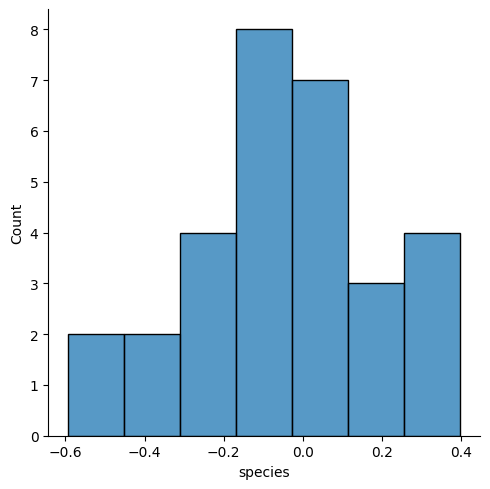

In [75]:
import seaborn as sns
sns.displot(reg_pred-y_test)

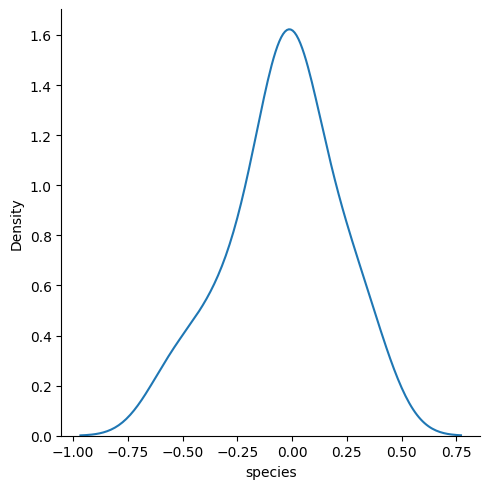

In [76]:
sns.displot (reg_pred-y_test,kind='kde')

In [77]:
from sklearn.metrics import r2_score
score = r2_score(reg_pred,y_test)
score

0.8988568693810502

### Logistic Regression:

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
classifier = LogisticRegression()

In [80]:
classifier

LogisticRegression()

In [81]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [82]:
classifier_regressor = GridSearchCV(classifier,param_grid = parameter,scoring='accuracy',cv = 5)

In [83]:
classifier_regressor.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.10/site-packages/sklearn/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [84]:
print(classifier_regressor.best_params_)

{'C': 20, 'max_iter': 100, 'penalty': 'l2'}


In [85]:
print(classifier_regressor.best_score_)

0.9833333333333334


In [86]:
#prediction
classifier_regressor.predict(x_test)

array([0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1])

In [87]:
y_pred =classifier_regressor.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1])

In [88]:
# accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [89]:
score = accuracy_score(y_pred,y_test)
print(score)

0.9666666666666667


In [90]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### Decision Tree:

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
# PostPruning technique
treemodel = DecisionTreeClassifier()

In [93]:
treemodel

DecisionTreeClassifier()

In [94]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.75\ngini = 0.666\nsamples = 120\nvalue = [39, 43, 38]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.498\nsamples = 81\nvalue = [0, 43, 38]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.124\nsamples = 45\nvalue = [0, 42, 3]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.087\nsamples = 44\nvalue = [0, 42, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.25, 0.21428571428571427, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1

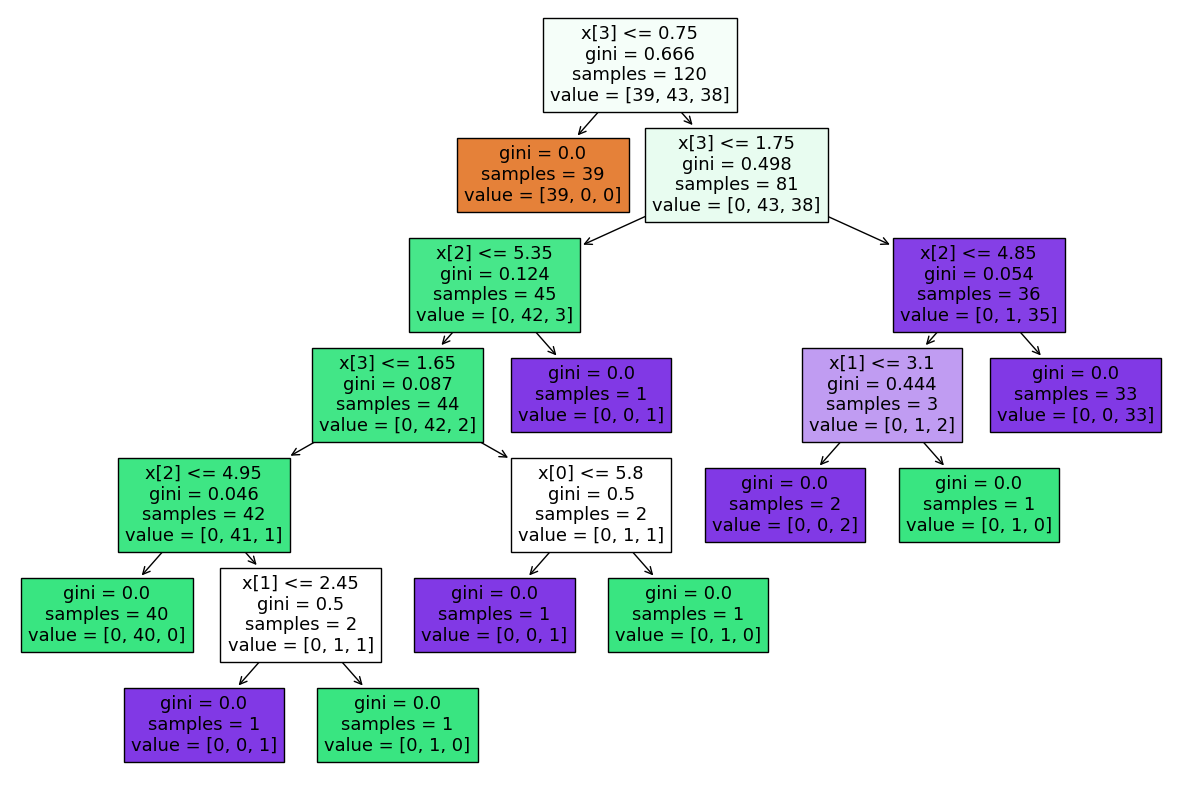

In [95]:
# constructing Tree

from sklearn import tree

plt.figure(figsize = (15,10))

tree.plot_tree(treemodel,filled = True)

In [96]:
# PostPruning technique
treemodel = DecisionTreeClassifier(max_depth = 2)
treemodel

DecisionTreeClassifier(max_depth=2)

In [97]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [39, 43, 38]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.498\nsamples = 81\nvalue = [0, 43, 38]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.124\nsamples = 45\nvalue = [0, 42, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.054\nsamples = 36\nvalue = [0, 1, 35]')]

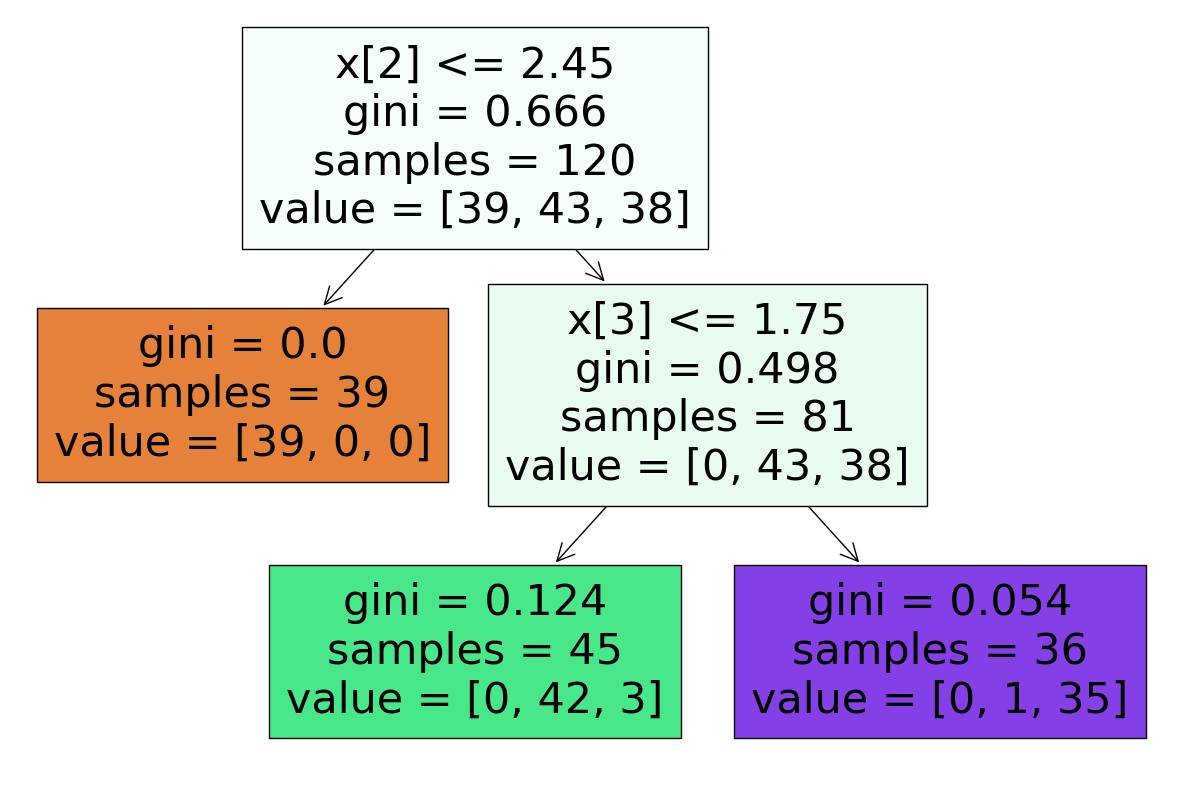

In [98]:
# constructing Tree

from sklearn import tree

plt.figure(figsize = (15,10))
tree.plot_tree(treemodel,filled = True)

In [99]:
#prediction
y_pred =treemodel.predict(x_test)

In [100]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1])

In [101]:
from sklearn.metrics import accuracy_score,classification_report

In [102]:
score = accuracy_score(y_pred,y_test)
print(score)

0.9333333333333333


In [103]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.78      0.88         9
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



### Random Forest:

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
fit_rf = RandomForestClassifier(random_state=40)

In [106]:
#Hyper-Parameter Optimization Using GridSearchCV

param_dist = {'max_depth' : [2,3,4,5],
            'bootstrap' : [True,False],
            'max_features' : ['auto', 'sqrt', 'log2', None],
            'criterion' : ['gini', 'entrophy']}

cv_rf = GridSearchCV(fit_rf, cv=10, param_grid=param_dist ,n_jobs=3)

cv_rf.fit(x_train,y_train)
print("Best parameters using Grid Search: \n", cv_rf.best_params_)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best parameters using Grid Search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': None}


In [107]:
fit_rf.set_params(bootstrap=True, criterion='gini', max_features=None, max_depth=2)

RandomForestClassifier(max_depth=2, max_features=None, random_state=40)

In [108]:
#Train the Random Forest
fit_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, max_features=None, random_state=40)

In [109]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1])

In [110]:
y_test

0      0
43     0
129    2
3      0
34     0
44     0
38     0
105    2
123    2
140    2
28     0
125    2
113    2
103    2
133    2
35     0
145    2
142    2
40     0
87     1
84     1
85     1
115    2
51     1
4      0
112    2
92     1
64     1
10     0
91     1
Name: species, dtype: int64

In [111]:
# accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [112]:
score = accuracy_score(y_pred,y_test)
print(score)

0.9333333333333333


In [113]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.78      0.88         9
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



# **Naïve Bayes**

In [114]:
from sklearn.naive_bayes import GaussianNB

In [115]:
# Initializing the Gaussian Classifier
model = GaussianNB()

# Train the model
model.fit(x_train, y_train)

GaussianNB()

In [116]:
# Predict Output 
pred = model.predict(x_test)
print()

In [117]:
score = accuracy_score(y_pred,y_test)
print(score)

0.9333333333333333


In [118]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.78      0.88         9
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



# **K-NearestNneighbours**

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Now let’s input a set of measurements of the iris flower and use the model to predict the iris species:

In [120]:
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: [0]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



> Prediction: [0] ≃ ***'Iris-setosa'***

In [121]:
# Predict Output 
pred = model.predict(x_test)
print(pred)

[0 0 2 0 0 0 0 2 2 2 0 2 2 2 1 0 2 2 0 1 1 1 2 1 0 2 1 1 0 1]


In [122]:
score = accuracy_score(y_pred,y_test)
print(score)

0.9333333333333333


In [123]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.78      0.88         9
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



# Summary

So this is how you can train a machine learning model for the task of Iris classification using Python. Iris Classification is one of the most popular case studies among the data science community. Almost every data science newbie has solved this case study once in their life. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=63a23088-2600-4d68-b4c0-aa7797be8316' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>